# Informações Relevantes sobre os dados

Esse *dataset* foi disponibilizado publicamente no site da UCI Machine Learning Repository, disponível em: <http://archive.ics.uci.edu/ml/datasets/Bank+Marketing>. 

Os dados foram coletados do Banco de Portugal, em: <https://www.bportugal.pt/estatisticasweb>


# Variáveis Analisadas

### Características dos clientes:

1 - [idade] age (numeric)

2 - [emprego] job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

3 - [estado_civil] marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

4 - [educação] education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

5 - [inadimplência] default: has credit in default? (categorical: "no","yes","unknown")

6 - [empréstimo_imobiliario] housing: has housing loan? (categorical: "no","yes","unknown")

7 - [empréstimo]: has personal loan? (categorical: "no","yes","unknown")

### Último contato feito:

8 - [forma_contato] contact: contact communication type (categorical: "cellular","telephone") 

9 - [mês_contato] month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

10 - [dia_contato] day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

11 - [duração_contato] duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Outros atributos do cliente na campanha:

12 - [num_contatos] campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - [dias_ultimo_contato] pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - [contatos_anteriores] previous: number of contacts performed before this campaign and for this client (numeric)

15 - [resultado_anterior] poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

### Contexto socioeconômico dos clientes:

16 - [indice_desemprego] emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - [CPI] cons.price.idx: consumer price index - monthly indicator (numeric)     

18 - [CCI] cons.conf.idx: consumer confidence index - monthly indicator (numeric)  

19 - [Euribor] euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - [num_desemprego] nr.employed: number of employees - quarterly indicator (numeric)

### Variável-Alvo:

21 - [resultado] y: has the client subscribed a term deposit? (binary: "yes","no")

# Valores Faltantes

Todos os valores faltantes foram imputados como "unknown".

# Importação de Dados

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
dados = pd.read_csv("../dados/bank-additional-full.csv", sep=";")

dados = dados.rename(columns={
    "antigo":"novo"
})
dados.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Limpeza de Dados

Devemos verificar:
* estrutura
* granularidade
* escopo
* temporalidade
* corretude

Operações:
* Limpeza de NAs
* padronizações
* tipagem

## Lidando com os NA's

Os dados faltantes das colunas de "Características dos Clientes" foram imputados com a palavra "unknown". Para tratá-los, precisamos transformá-los em NaNs.

Além disso, os valores faltantes da coluna "pdays" foram imputados com "999". 

In [6]:
df = dados.copy()
df = df.apply(lambda x: x.replace('unknown', np.nan))
df["pdays"] = df["pdays"].replace(999, np.nan)

In [7]:
df.info() #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           1515 non-null   float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Podemos observar que há valores faltantes nas colunas "default", "education", "job", "housing", "loan" e "pdays". Vamos verificar o quanto isso representa do total de amostras, individualmente.

In [8]:
tmp = df[["default", "education", "job", "housing", "loan", "pdays"]]
tmp.isna().sum().sort_values(ascending=False)/len(df)

pdays        0.963217
default      0.208726
education    0.042027
housing      0.024036
loan         0.024036
job          0.008012
dtype: float64

As colunas que contém +5% de NA's em relação à quantidade total de observações são: "default" e "pdays". Vamos verificar a correlação entre elas e o alvo. Caso não seja significante (+5%), optaremos por apagá-las assumindo que não haverá perda de informação.

Já as outras colunas contém uma baixa quantidade de dados faltantes, por isso é razoável remover todas as linhas que contenham ao menos um dado faltante.

In [9]:
tmp = df[["pdays","y"]]
tmp = tmp.apply(lambda x: x.replace('no', 0))
tmp = tmp.apply(lambda x: x.replace('yes', 1))

print("correlação pdays-y:", tmp.corr()["y"][0].round(2))

tmp = df[["default","y"]]
tmp = tmp.apply(lambda x: x.replace('no', 0))
tmp = tmp.apply(lambda x: x.replace('yes', 1))

print("correlação default-y:", tmp.corr()["y"][0].round(2))

df.drop(["default", "pdays"], axis=1, inplace=True) # apaga as colunas
df.dropna(inplace=True) # apaga os NA's das linhas restantes

correlação pdays-y: -0.04
correlação default-y: -0.0


# Análise Exploratória dos Dados (apontar padrões e formular perguntas)

Vamos verificar a maneira como os dados estão descritos.

O primeiro ponto a se considerar é de que o pandas realiza a tipagem das colunas de forma automática. Nesse sentido, caso haja algum NA na coluna, o csv viria com "unknown" e por conta dessa string, todos os dados da coluna seriam convertidos para o tipo "object", ou seja, não numérico. Como as únicas colunas que continham NA's são categóricas não ordinais, nenhuma tipagem foi feita de maneira errada. 

Dessa forma, a partir da função `df.info`, podemos verificar que as variáveis que contém números são: 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'. Ao visualizá-las, confirma-se que as variáveis  


In [10]:
print("Nomes das colunas: ", list(df.columns))
df.iloc[:, 9:19].head() # Colunas numéricas
# fazer analises

Nomes das colunas:  ['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Visualização das estatísticas descritivas

In [11]:
df.describe(include="object") # Categóricas

,job,marital,education,housing,loan,contact,month,day_of_week,poutcome,y
count,38245,38245,38245,38245,38245,38245,38245,38245,38245,38245
unique,11,3,7,2,2,2,10,5,3,2
top,admin.,married,university.degree,yes,no,cellular,may,thu,nonexistent,no
freq,9937,23183,11821,20578,32286,24441,12794,8011,33066,33987


In [12]:
df.describe() # Numéricas

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000
mean,39.860871,258.207583,2.566662,0.170009,0.082861,93.570313,-40.541164,3.623298,5167.432566
std,10.289488,259.792638,2.767473,0.487169,1.565945,0.576367,4.623200,1.730226,71.760333
min,17.000000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,43.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Testes de Hipótese

## 1) Diferença de médias (bootstrap) entre o estado civil, idade, classe social e educação

In [13]:
tmp.head()

,default,y
0,0.0,0
1,NaN,0
2,0.0,0
3,0.0,0
4,0.0,0


Text(0.5, 1.0, 'Aceitaram')

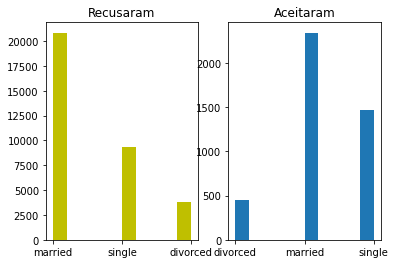

In [15]:
tmp1 = df[df["y"] == 'no']["marital"]
tmp2 = df[df["y"] == 'yes']["marital"]

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(tmp1, color="y")
ax1.set_title('Recusaram')
ax2.hist(tmp2)
ax2.set_title('Aceitaram')

In [16]:
def bootstrap_diff_mean(vet_1, vet_2, n=1000):
    size1, size2 = len(vet_1), len(vet_2)
    values_diff = np.zeros(n)
    for i in range(n):
        np.random.seed(i)
        sample1 = np.random.choice(vet_1, size=size1, replace=True)
        sample2 = np.random.choice(vet_2, size=size2, replace=True)
        values_diff[i] = sample1.mean() - sample2.mean()
    
    pct_inf = np.percentile(values_diff, 2.5)
    pct_sup = np.percentile(values_diff, 97.5)

    return pct_inf.round(4), pct_sup.round(4)

In [17]:
tmp1 = df[df["y"] == 'no']
tmp1 = tmp1["marital"].replace("divorced", "single")
tmp1 = np.where(tmp1 == "married", 1, 0)

tmp2 = df[df["y"] == 'yes']
tmp2 = tmp2["marital"].replace("divorced", "single")
tmp2 = np.where(tmp2 == "married", 1, 0)

print("IC para média entre casados:", bootstrap_diff_mean(tmp1, tmp2))

IC para média entre casados: (0.0474, 0.0791)


In [18]:
tmp1 = df[df["y"] == 'no']
tmp1 = tmp1["marital"].replace("divorced", "single")
tmp1 = np.where(tmp1 == "married", 1, 0)
tmp2 = df[df["y"] == 'yes']
tmp2 = tmp2["marital"].replace("divorced", "single")
tmp2 = np.where(tmp2 == "married", 1, 0)

print("IC para média entre casados e solteiros:", bootstrap_diff_mean(tmp1, tmp2))

IC para média entre casados e solteiros: (0.0474, 0.0791)


## 2) diferença de média (permutação) de acerto da campanha entre sexta e os demais dias

## 3) Diferença de médias da variável y para pessoas que contraíram algum tipo de empréstimo 

In [40]:
tmp = df[["housing", "loan", "y"]]

loan = []
for i in range(len(tmp)):
    if tmp["housing"].iloc[i] == 'yes' or tmp["loan"].iloc[i] == 'yes':
        loan.append('yes')
    else:
        loan.append('no')

tmp["emprestimo"] = pd.Series(loan)
tmp.drop(["loan", "housing"], axis=1, inplace=True)
tmp.dropna(inplace=True)
tmp.head(3)

,y,emprestimo
0,no,no
1,no,no
2,no,yes


#### Teste Hipótese 3

In [41]:
def bootstrap_diff_mean(vet_1, vet_2, n=1000):
    size1, size2 = len(vet_1), len(vet_2)
    values_diff = np.zeros(n)
    for i in range(n):
        np.random.seed(i)
        sample1 = np.random.choice(vet_1, size=size1, replace=True)
        sample2 = np.random.choice(vet_2, size=size2, replace=True)
        values_diff[i] = sample1.mean() - sample2.mean()
    
    pct_inf = np.percentile(values_diff, 2.5)
    pct_sup = np.percentile(values_diff, 97.5)

    return pct_inf.round(4), pct_sup.round(4), values_diff

In [42]:
tmp1 = tmp[tmp["y"] == 'no']["emprestimo"]
tmp1 = np.where(tmp1 == "yes", 1, 0)

tmp2 = tmp[tmp["y"] == 'yes']["emprestimo"]
tmp2 = np.where(tmp2 == "yes", 1, 0)

print("IC:", bootstrap_diff_mean(tmp1, tmp2)[:2]) # Inclui 0 então é possível explicar pela aleatoriedade

IC: (-0.0331, 0.0021)


O intervalo de confiança para a diferença de média entre os grupos inclui a possibilidade de a estatística ser igual a zero, o que significa que não é possível apontar diferença entre a distribuição da média da variável y (variável Bernoulli indicativa de sucesso no aceite da campanha) para grupos que contraíram pelo menos um tipo de empréstimo no momento em que foram contatados. 

#### EDA

In [69]:
tmp.value_counts()

y    emprestimo
no   yes           19663
     no            13001
yes  yes            1811
     no             1126
dtype: int64

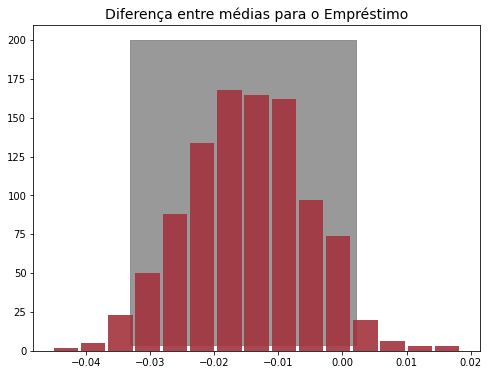

In [73]:
bootstrap = bootstrap_diff_mean(tmp1, tmp2)

plt.hist(bootstrap[2], color='#A3333D', alpha=0.9, density=False, bins=15, rwidth=0.9)
plt.title('Diferença entre médias para o Empréstimo', fontsize=14)
plt.fill_between([bootstrap[0], bootstrap[1]], 200, 4, color='grey', alpha=0.8)
fig.tight_layout()
plt.show()

### 4) Avaliar se a amostra é desbalanceada em relação à variável y

In [ ]:
tmp = df[["housing", "loan", "y"]]

loan = []
for i in range(len(tmp)):
    if tmp["housing"].iloc[i] == 'yes' or tmp["loan"].iloc[i] == 'yes':
        loan.append('yes')
    else:
        loan.append('no')

tmp["emprestimo"] = pd.Series(loan)
tmp.drop(["loan", "housing"], axis=1, inplace=True)
tmp.dropna(inplace=True)
tmp.head(3)

#### Teste Hipótese 4

In [35]:
def classic_ic(vetor):
  # altere a função para retornar uma tupla (LI, LS) com os limites do intervalo de confiança
  x_bar = np.mean(vetor) # p
  std_bar = np.std(vetor) # p(1-p)
  n = len(vetor)
  
  pct_inf = x_bar - (1.96*std_bar/(n**0.5))
  pct_sup = x_bar + (1.96*std_bar/(n**0.5))

  return pct_inf.round(4), pct_sup.round(4)

In [38]:
tmp3 = np.where(tmp["y"] == 'yes', 1, 0)

print("IC:", classic_ic(tmp3)) 
print("Proporção Amostral:", tmp3.mean().round(4))

IC: (0.0796, 0.0854)
Proporção Amostral: 0.0825


O valor de 50% não está incluído no intervalo de confiança para a distribuição real da média populacional $\mu$. Isso significa que o fato de a média da variável y ser de 8,25% é muito raro e não pode ser explicado pela aleatoriedade (caso em que a média é 50%). Outro fator a se analisar pode ser de que a seleção da amostra pode ter sido feita de forma enviesada, e por isso ela foi coletada de forma desbalanceada de uma forma que não pode ser explicada pela aleatoriedade.

#### EDA

In [63]:
print("Estatísticas Descritivas")
pd.Series(tmp3).describe()[:3].round(3)

Estatísticas Descritivas


count    35601.000
mean         0.082
std          0.275
dtype: float64

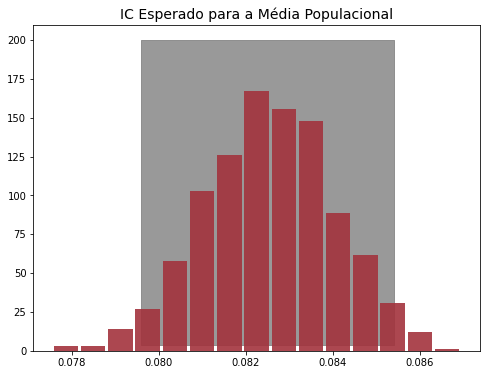

In [78]:
import numpy as np
rand_norm = np.random.normal(tmp3.mean(), tmp3.std()/(len(tmp3)**0.5), 1000)
ic = classic_ic(tmp3)

plt.hist(rand_norm, color='#A3333D', alpha=0.9, density=False, bins=15, rwidth=0.9)
plt.title('IC Esperado para a Média Populacional', fontsize=14)
plt.fill_between([ic[0], ic[1]], 200, 4, color='grey', alpha=0.8)
fig.tight_layout()
plt.show()

# Problema de Pesquisa